In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [5]:
df.shape

(100, 4)

In [6]:
df = df.iloc[:,1:]

In [7]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [8]:
# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model

In [9]:
import matplotlib.pyplot as plt


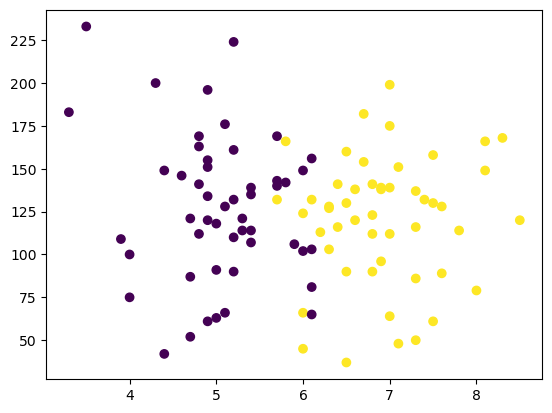

In [10]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [11]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [12]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [13]:
y.shape

(100,)

In [14]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [15]:
X_train

,cgpa,iq
15,5.1,176.0
98,6.3,103.0
14,6.1,103.0
66,6.9,96.0
81,5.4,107.0
...,...,...
96,4.4,42.0
74,6.7,154.0
3,7.4,132.0
93,6.8,112.0


In [16]:
y_train

15    0
98    1
14    0
66    1
81    0
     ..
96    0
74    1
3     1
93    1
36    0
Name: placement, Length: 90, dtype: int64

In [17]:
X_test

,cgpa,iq
77,7.3,50.0
24,4.7,121.0
22,4.9,120.0
63,6.3,128.0
30,7.6,128.0
9,5.1,66.0
57,6.5,130.0
46,5.3,114.0
82,6.5,37.0
65,8.1,166.0


In [18]:
y_test

77    1
24    0
22    0
63    1
30    1
9     0
57    1
46    0
82    1
65    1
Name: placement, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()

In [21]:
X_train = scaler.fit_transform(X_train)

In [22]:
X_train

array([[-0.76167114,  1.28232167],
       [ 0.29566155, -0.57255578],
       [ 0.11943943, -0.57255578],
       [ 0.82432789, -0.75042074],
       [-0.49733797, -0.47091866],
       [ 0.55999472,  0.31676902],
       [-1.02600431, -0.34387226],
       [-0.8497822 , -0.87746714],
       [-1.37844854,  0.59627111],
       [ 0.38377261, -0.24223514],
       [-2.17144806,  2.73065063],
       [ 0.11943943,  0.16431334],
       [-1.20222643,  0.52004327],
       [-0.67356008,  0.16431334],
       [ 0.03132838, -1.51269914],
       [-0.49733797,  0.24054118],
       [ 0.03132838, -0.59796506],
       [ 0.73621683,  0.39299687],
       [-0.93789326,  0.2151319 ],
       [ 0.03132838, -2.04629402],
       [-1.02600431,  0.95200103],
       [ 1.35299424,  0.82495463],
       [ 0.91243895,  1.86673511],
       [ 0.82432789,  0.31676902],
       [ 1.00055001,  0.64708967],
       [-0.2330048 ,  1.10445671],
       [-1.73089277, -0.64878362],
       [ 0.29566155,  0.03726694],
       [-0.8497822 ,

In [23]:
X_test = scaler.transform(X_test)

In [24]:
X_test

array([[ 1.17677212, -1.91924762],
       [-1.11411537, -0.11518874],
       [-0.93789326, -0.14059802],
       [ 0.29566155,  0.06267622],
       [ 1.44110529,  0.06267622],
       [-0.76167114, -1.51269914],
       [ 0.47188366,  0.11349478],
       [-0.58544903, -0.2930537 ],
       [ 0.47188366, -2.24956826],
       [ 1.88166058,  1.02822887]])

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
clf = LogisticRegression()

In [27]:
# model training
clf.fit(X_train,y_train)

LogisticRegression()

In [28]:
y_pred = clf.predict(X_test)

In [29]:
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 1, 1], dtype=int64)

In [30]:
y_test

77    1
24    0
22    0
63    1
30    1
9     0
57    1
46    0
82    1
65    1
Name: placement, dtype: int64

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(y_test,y_pred)

1.0

In [33]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

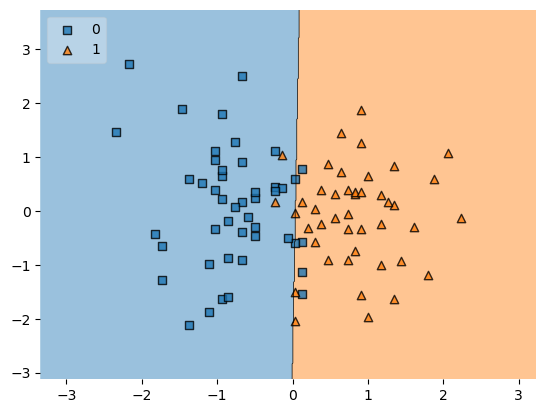

In [34]:
plot_decision_regions(X_train, y_train.values, clf=clf, legend=2)

In [35]:
import pickle

In [36]:
pickle.dump(clf,open('model.pkl','wb'))